In [1]:
# Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [13]:
# Read data
url = "https://drive.google.com/file/d/1frEhHHnMbib-f56jSNu_aDjxKRqtAcuZ/view?usp=share_link"
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
artists_df = pd.read_csv(dwn_url)

# Data Exploration

In [17]:
# Check dimensions
artists_df.shape

(1162095, 5)

In [15]:
# Check columns and data types
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [20]:
# Check the first 10 registries
artists_df.head(10)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


In [27]:
# Check missing values
artists_df.isnull().sum()

id             0
followers     11
genres         0
name           0
popularity     0
dtype: int64

In [30]:
# Check duplicate rows
artists_df.duplicated().sum()

0

In [32]:
# Check duplicates in the "name" column 
artists_df.duplicated(subset=["name"]).sum()

27665

In [33]:
# Check duplicates based on both the "genres" and "name" columns
artists_df.duplicated(subset=["genres","name"]).sum()

14881

# Univariate Analysis

## Quantitative Variables

In [34]:
# Statistical summary
artists_df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [40]:
# Check outliers
def count_outliers(df, col):
    """
    Returns the number of outliers in a column of a DataFrame using the Tukey's method.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    col : str
        Name of the column to be analyzed
        
    Returns:
    --------
    count : int
        Number of outliers in the specified column
        
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    count = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()
    
    return count


In [41]:
print("Number of outliers in the followers column:", count_outliers(artists_df, "followers"))
print("Number of outliers in the popularity column:", count_outliers(artists_df, "popularity"))

Number of outliers in the followers column: 197166
Number of outliers in the popularity column: 95238


In [57]:
# Histogram
def plot_histogram(df, col):
    """
    Generates a histogram of a specified variable in a given DataFrame.
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing the data.
    variable (str): Name of the variable to generate the histogram for.
    
    Returns:
    None. The function displays the histogram plot.
    """
    plt.hist(df[col], bins=20, alpha=0.5)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

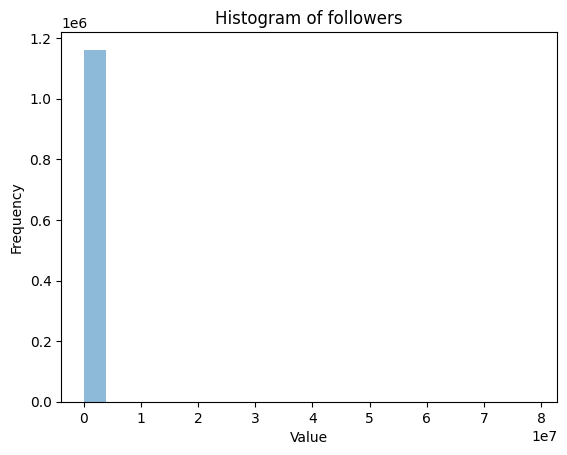

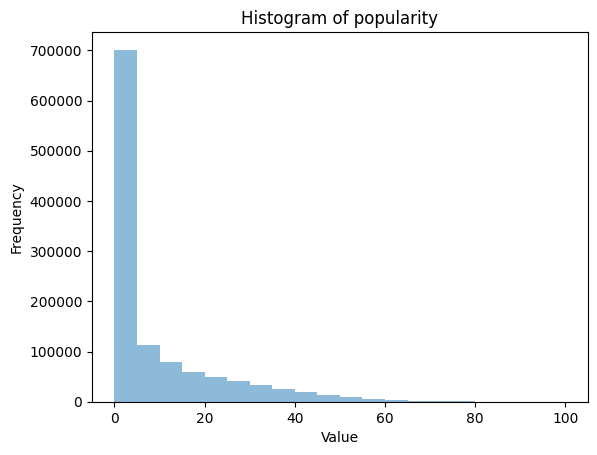

In [58]:
plot_histogram(artists_df, "followers")
plot_histogram(artists_df, "popularity")

In [55]:
# Boxplot
def plot_boxplot(df, col):
    '''
    Creates a boxplot of a numeric variable in a pandas dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    column (str): The name of the numeric column in the dataframe to be plotted.

    Returns:
    None
    '''
    plt.figure(figsize=(8,6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

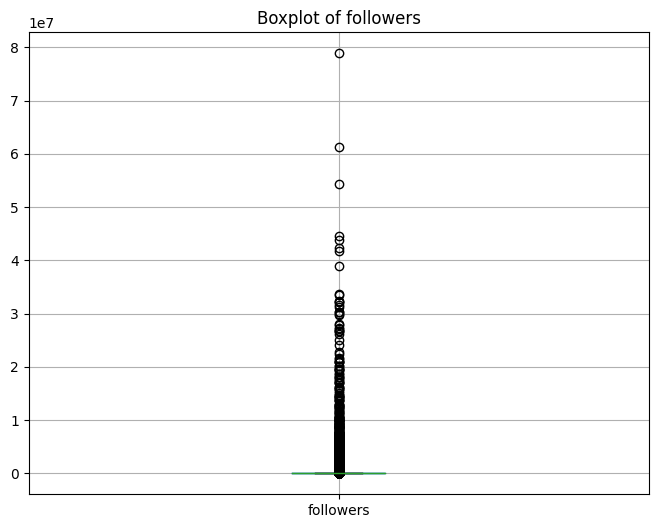

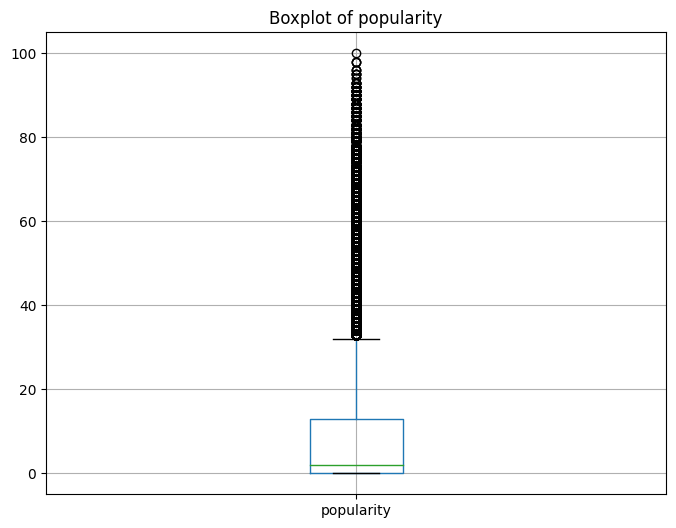

In [56]:
plot_boxplot(artists_df, "followers")
plot_boxplot(artists_df, "popularity")

## Qualitative Variables

In [29]:
# Statistical summary 
artists_df.describe(include='object')

,id,genres,name
count,1162095,1162095,1162095
unique,1162095,49155,1134430
top,0DheY5irMjBUeLybbCUEZ2,[],Ace
freq,1,856500,13
